Dataset preview:
   Gaji  Pengeluaran
0  2500         1750
1  3800         4200
2  3900         3800
3  4350         5500
4  4400         3200

Missing values:
Gaji           0
Pengeluaran    0
dtype: int64


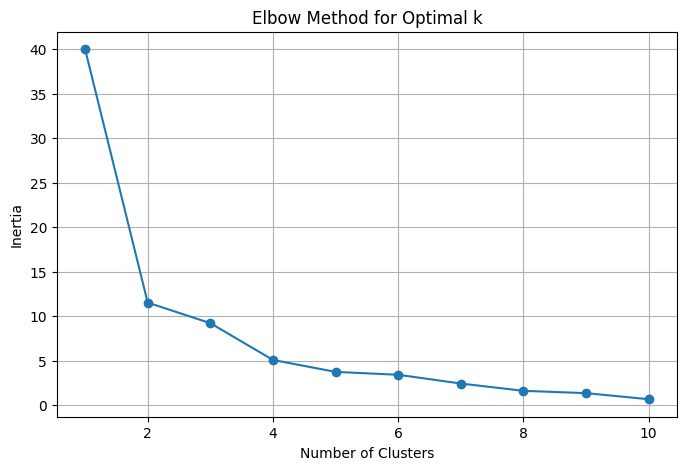


Dataset with cluster labels:
   Gaji  Pengeluaran  Cluster
0  2500         1750        2
1  3800         4200        0
2  3900         3800        0
3  4350         5500        0
4  4400         3200        0


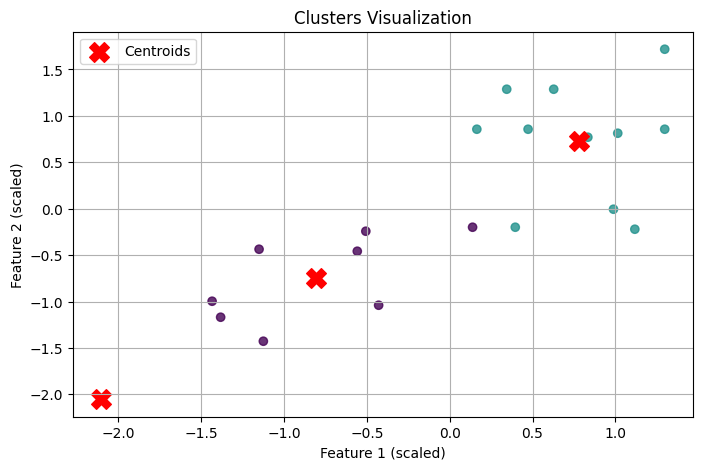

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('konsumen.csv')

# Display the first few rows of the dataset
print("Dataset preview:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Data preprocessing
# Assuming the dataset has numerical and categorical columns
# Select relevant columns (replace 'NumericalColumn1', 'NumericalColumn2' with actual column names)
numerical_columns = ['Gaji', 'Pengeluaran']
data = df[numerical_columns]

# Normalize the data using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Determine the optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# From the elbow plot, choose the optimal number of clusters (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Display the first few rows of the dataset with cluster labels
print("\nDataset with cluster labels:")
print(df.head())

# Visualize the clusters (if the data has 2 or 3 dimensions)
plt.figure(figsize=(8, 5))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids', marker='X')
plt.title('Clusters Visualization')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.grid(True)
plt.show()

